In [2]:
from PIL import Image
import numpy as np
import cv2
np.set_printoptions(threshold=np.inf)
from labels import labels, label_id

In [18]:
path_to_dataset = 'S:\\Datasets\\CityScapes'
gtCoarse = '\\gtCoarse'
gtFine = '\\gtFine'
leftImg8bit = '\\leftImg8bit'

train = '\\train'
train_extra = '\\train_extra'
val = '\\val'
test = '\\test'

first = 'cologne_000000_000019_gtFine_color.png'
second = 'cologne_000000_000019_gtFine_instanceIds.png'
third = 'cologne_000000_000019_gtFine_labelIds.png'
img = 'cologne_000000_000019_leftImg8bit.png'



In [7]:
def read_and_display_image(file_path):
    try:
        image = Image.open(file_path)
        image.show()
        image_array = np.array(image)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except IOError:
        print(f"Error: An error occurred while reading the file '{file_path}'.")

    print(image_array.shape)

In [8]:
read_and_display_image(path_to_dataset+gtFine+train+'\\aachen\\'+second)

(1024, 2048)


In [9]:
def generate_bounding_boxes(class_path, instance_path):
    """
    Generates bounding boxes for each instance in the instance image with corresponding class IDs.
    
    Args:
        class_path (String): Path to class image
        instance_path (String): Path to instance image
        
    Returns:
        list: A list of dictionaries containing bounding boxes with class IDs. 
              Each dictionary has the format {'instance_id': int, 'class_id': int, 'bbox': (x, y, w, h)}.
    """
    print(class_path)
    print(instance_path)
    class_image = cv2.imread(class_path, cv2.IMREAD_UNCHANGED)
    instance_image = cv2.imread(instance_path, cv2.IMREAD_UNCHANGED)
    print(class_image.shape)

    instance_ids = np.unique(instance_image)
    #instance_ids = instance_ids[instance_ids != 0]  # Ignore background if instance ID is zero
    bounding_boxes = []
    
    for instance_id in instance_ids:
        # Create a mask for the current instance
        mask = (instance_image == instance_id).astype(np.uint8)
        
        # Find contours in the instance mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            
            x, y, w, h = cv2.boundingRect(contour)
            # Get the class ID from the class_image using a pixel from the instance mask
            class_id = class_image[contour[0][0][1], contour[0][0][0]]  # Take the top-left corner pixel for class ID
            class_id = class_id[:-1][::-1]
            class_id = labels[tuple(class_id)]
            if class_id != "void":

            
                bounding_boxes.append({
                    'instance_id': int(instance_id),
                    'class_id': class_id,
                    'bbox': (x, y, w, h)
                })
    
    return bounding_boxes

In [23]:
bboxes = generate_bounding_boxes(class_path=path_to_dataset+gtFine+train+'\\cologne\\'+first, instance_path=path_to_dataset+gtFine+train+'\\cologne\\'+second)

S:\Datasets\CityScapes\gtFine\train\cologne\cologne_000000_000019_gtFine_color.png
S:\Datasets\CityScapes\gtFine\train\cologne\cologne_000000_000019_gtFine_instanceIds.png
(1024, 2048, 4)


In [12]:
def draw_bounding_boxes(image, boxes, class_ids, instance_ids, color=(0, 255, 0), thickness=2):
    """
    Draws bounding boxes on an image.

    Args:
        image (np.ndarray): The input image on which to draw the bounding boxes.
        boxes (list of tuples): A list of tuples, each containing bounding box coordinates (x, y, w, h).
        color (tuple): The color of the bounding boxes in (B, G, R) format. Default is green (0, 255, 0).
        thickness (int): The thickness of the bounding box lines. Default is 2.

    Returns:
        np.ndarray: The image with the bounding boxes drawn.
    """
    for (x, y, w, h), class_id in zip(boxes, class_ids):
        # Calculate the bottom-right corner coordinates
        top_left = (x, y)
        bottom_right = (x + w, y + h)
        # Draw the rectangle on the image
        
        cv2.rectangle(image, top_left, bottom_right, color, thickness)
        cv2.putText(img=image, text=str(class_id), org=(x, y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 255))

    return image

In [24]:
boxes = [box['bbox'] for box in bboxes]
class_ids = [box['class_id'] for box in bboxes]
instance_ids = [box['instance_id'] for box in bboxes]
image = cv2.imread(path_to_dataset+leftImg8bit+train+'\\cologne\\'+img)
img_with_bb = draw_bounding_boxes(image=image, boxes=boxes, class_ids=class_ids, instance_ids=instance_ids)

In [25]:
cv2.imshow("test", img_with_bb)
cv2.waitKey(0)

-1

In [10]:
path_to_dataset = 'S:\\Datasets\\CityScapes'
gtCoarse = 'gtCoarse'
gtFine = 'gtFine'
leftImg8bit = '\\leftImg8bit'

train = '\\train'
train_extra = '\\train_extra'
val = '\\val'

In [11]:
ground_truths = {
    gtFine : [train, val],
    gtCoarse : [train, train_extra, val]
}


In [39]:
import json

# Sample COCO format annotation dictionary
coco_annotations = {
    "info": {
        "description": "Cityscapes to COCO Bounding Boxes",
        "version": "1.0",
        "year": 2024,
        "contributor": "Edward Kromm",
        "date_created": "2024-11-04"
    },
    "licenses": [
        {
            "id": 1,
            "name": "License Name",
            "url": "http://example.com/license"
        }
    ],
    "images": [
        #{
           # "id": 1,
           #"width": 640,
           #"height": 480,
           # "file_name": "image1.jpg",
           # "license": 1,
           # "date_captured": "2024-10-17"
        #}
    ],
    "annotations": [
        #{
           # "id": 1,
           # "image_id": 1,
           # "category_id": 1,
           # "area": 2500,
           # "bbox": [100, 100, 50, 50],
           # "iscrowd": 0
        #}
    ],
    "categories": [
        #{
           # "id": 1,
           # "name": "category1",
           # "supercategory": "supercategory1"
        #}
    ]
}

In [20]:
def is_image_in_annotations(image_name, annotations):
    print(image_name)
    try:
        existing_names = {image["file_name"] for image in annotations["images"]}
    except KeyError: # First try needs to be catched
        return False
    return image_name in existing_names

In [21]:
def is_categorie_in_annotations(categorie, annotations):
    try:
        existing_categories = {categorie["name"] for categorie in annotations["categories"]}
    except KeyError: # First try needs to be catched
        return False
    return categorie in existing_categories

In [40]:
import os

id_image_counter = 0
id_annotation_counter = 0


for gt in ground_truths.keys():
    for folder in ground_truths[gt]:
        path = path_to_dataset + "\\"+ gt + folder
        city_folders = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
        for city in city_folders:
            files = [name for name in os.listdir(path+"\\"+city) if os.path.isfile(os.path.join(path+"\\"+city, name))]
            for file_name in files:
                print(os.path.join(path+"\\"+city+"\\"+file_name))
                cutted_name = '_'.join(file_name.split('_')[:-2])
                if not is_image_in_annotations(cutted_name, annotations=coco_annotations):
                    image = cv2.imread(os.path.join(path+"\\"+city+"\\"+file_name))
                    annotations = generate_bounding_boxes(class_path=path+"\\"+city+"\\"+cutted_name+"_"+gt+"_color.png", 
                                                         instance_path=path+"\\"+city+"\\"+cutted_name+"_"+gt+"_instanceIds.png")
                    height, width, _ = image.shape
                    coco_annotations["images"].append({
                        "id" : id_image_counter,
                        "width" : width,
                        "height" : height,
                        "file_name" : cutted_name,
                        "gt_&_city" : [gt, folder, city],
                        "license" : "NONE",
                        "date_captured" : "NONE" 
                    })
                    boxes = [box['bbox'] for box in annotations]
                    class_ids = [box['class_id'] for box in annotations]
                    for (x, y, w, h), class_id in zip(boxes, class_ids):
                        coco_annotations["annotations"].append({
                            "id" : id_annotation_counter,
                            "image_id" : id_image_counter,
                            "category_id" : label_id[class_id],
                            "area" : w*h,
                            "bbox" : [x, y, w, h],
                            "iscrowd" : 0
                        })
                        id_annotation_counter += 1
                        if not is_categorie_in_annotations(class_id, annotations=coco_annotations):
                            coco_annotations["categories"].append({
                                "id" : label_id[class_id],
                                "name" : class_id
                            })
                    break
                id_image_counter += 1
                break
            break
        break
    break
with open('coco_annotations.json', 'w') as f:
    json.dump(coco_annotations, f, indent=4)


S:\Datasets\CityScapes\gtFine\train\aachen\aachen_000000_000019_gtFine_color.png
aachen_000000_000019
S:\Datasets\CityScapes\gtFine\train\aachen\aachen_000000_000019_gtFine_color.png
S:\Datasets\CityScapes\gtFine\train\aachen\aachen_000000_000019_gtFine_instanceIds.png
(1024, 2048, 4)


In [14]:
import matplotlib.pyplot as plt
import json

with open('coco_annotations.json', 'r') as f:
        annotations = json.load(f)


def display_annotations(coco_annotations):
    # Create a mapping from image id to file name
    image_id_to_file = coco_annotations["images"][0]["file_name"]
    image_id_to_file = path_to_dataset + leftImg8bit + coco_annotations["images"][0]["gt_&_city"][1] + "\\"+coco_annotations["images"][0]["gt_&_city"][2]+"\\" + image_id_to_file + "_leftImg8bit.png"
    
    # Create a mapping from annotation id to its details
    annotation_id_to_info = {}
    for ann in coco_annotations['annotations']:
        image_id = ann['image_id']
        if image_id not in annotation_id_to_info:
            annotation_id_to_info[image_id] = []
        annotation_id_to_info[image_id].append(ann)
    
    # Display each image with its annotations
    #for image_id, file_name in image_id_to_file.items():
        # Read the image
    image = cv2.imread(image_id_to_file)
    if image is None:
        print(f"Warning: Image {file_name} not found.")
        return 0
    
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a figure
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Draw the annotations
    if image_id in annotation_id_to_info:
        for annotation in annotation_id_to_info[image_id]:
            x, y, w, h = annotation['bbox']
            rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
            plt.gca().add_patch(rect)
            plt.text(x, y, str(annotation['category_id']), color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.title(f"Image ID: {image_id}, File: {file_name}")
    plt.show()


NameError: name 'file_name' is not defined

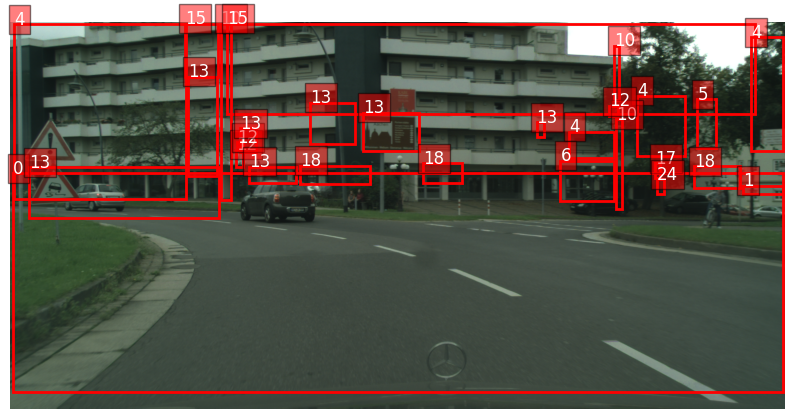

In [15]:
display_annotations(annotations)

path_to_dataset = 'S:\\Datasets\\CityScapes'
gtCoarse = '\\gtCoarse'
gtFine = '\\gtFine'
leftImg8bit = '\\leftImg8bit'

train = '\\train'
train_extra = '\\train_extra'
val = '\\val'
test = '\\test'

first = 'aachen_000000_000019_gtCoarse_color.png'
second = 'aachen_000000_000019_gtCoarse_instanceIds.png'
third = 'aachen_000000_000019_gtCoarse_labelIds.png'
img = 'aachen_000000_000019_leftImg8bit.png'

In [31]:
from pycocotools.coco import COCO
import os 
import cv2
import torch
coco = COCO("coco_annotations.json")

loading annotations into memory...
Done (t=1.99s)
creating index...
index created!


In [47]:
len(list(coco.imgs.keys()))

23473

In [35]:
image_ids = list(coco.imgs.keys())
def __getitem__(idx):
    image_id = image_ids[idx]
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join("S:\Datasets\CityScapes\leftImg8bit" + image_info['gt_&_city'][1], image_info['gt_&_city'][2], image_info["file_name"] + "_leftImg8bit.png")
    image = cv2.imread(image_path)
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))
    boxes = []
    labels = []
    for ann in annotations:
        boxes.append(ann["bbox"])
        labels.append(ann["category_id"])

        # Convert bbox from [x, y, width, height] to [x_min, y_min, x_max, y_max]
        boxes = np.array(boxes)
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]  # x_max = x_min + width
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]  # y_max = y_min + height

        sample = {
            'image': torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0,  # Normalize the image
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.long)
        }

        #if self.transforms:
        #    sample = self.transforms(sample)

        return sample

    return boxes

In [33]:
import random
class Preparator():
    def __init__(self, root_dir, annotation_file):
        self.root_dir = root_dir
        self.coco = COCO(annotation_file)
        self.image_ids = list(self.coco.imgs.keys())
        self.dataset_size = len(self.image_ids)

    def split_train_test(self, split):
        number_train_data = (int) (self.dataset_size * split)
        draws_train = random.sample(self.image_ids, number_train_data)
        draws_test = [value for value in self.image_ids not in draws_train]
        print(draws_train, draws_test)

In [36]:
__getitem__(2)

{'image': tensor([[[0.1059, 0.1059, 0.1020,  ..., 0.4392, 0.4392, 0.4471],
          [0.1059, 0.1020, 0.0980,  ..., 0.4510, 0.4471, 0.4471],
          [0.1098, 0.1020, 0.0941,  ..., 0.4510, 0.4510, 0.4471],
          ...,
          [0.1294, 0.1294, 0.1333,  ..., 0.2000, 0.2039, 0.2039],
          [0.1294, 0.1294, 0.1333,  ..., 0.2196, 0.2157, 0.2039],
          [0.1294, 0.1294, 0.1333,  ..., 0.2118, 0.2235, 0.2196]],
 
         [[0.1490, 0.1490, 0.1412,  ..., 0.5020, 0.5059, 0.5137],
          [0.1451, 0.1412, 0.1373,  ..., 0.5137, 0.5137, 0.5176],
          [0.1490, 0.1412, 0.1373,  ..., 0.5020, 0.5059, 0.5059],
          ...,
          [0.1529, 0.1490, 0.1529,  ..., 0.2392, 0.2353, 0.2353],
          [0.1529, 0.1490, 0.1529,  ..., 0.2549, 0.2510, 0.2392],
          [0.1529, 0.1490, 0.1529,  ..., 0.2549, 0.2588, 0.2549]],
 
         [[0.1020, 0.0980, 0.0941,  ..., 0.4392, 0.4353, 0.4431],
          [0.1020, 0.0941, 0.0941,  ..., 0.4510, 0.4510, 0.4510],
          [0.1020, 0.0980, 0.09